## 4/.Results - Conclusions

The table of contents:
<br> - 4.1. Import Libraries
<br> - 4.2 Summarize all the results

### 4.1. Import Libraries

In [22]:
# Import librairies
import os
import pandas as pd
import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Take seaborn as preference graphic interface
sns.set()

In [24]:
# Load Main data & Save Models in the following folders
path_main_save = '/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/'
path_secondary_save = 'US_Pesticide/2015PDPDatabase/SaveModels/'

path_save = os.path.join(path_main_save,path_secondary_save)
os.chdir(path_save)
os.getcwd()

'/Users/jeromeaubry/Chap5.1-Proposal-Capstone/Data/US_Pesticide/2015PDPDatabase/SaveModels'

### 4.2 Summarize all the results

In [25]:
# Open and gather all the models saved in *.csv in dataframe

total = []

for dirpath, dirnames, filenames in os.walk(path_save):
    for f in filenames:
        if (f.endswith('.csv')) & ('data_' not in f) & (f not in 'old'):
            df = pd.read_csv(os.path.join(dirpath,f))
            df['file'] = os.path.basename(f).split('.')[0] # Avoid taking the *.csv nomenclature in model name
            total.append(df)
            
total = pd.concat(total, axis=0, ignore_index=False, sort=True)
total = total.sort_values(by='mean_test_r2',ascending=False)
total

,Model,file,mean_test_MSE,mean_test_r2,mean_train_MSE,mean_train_r2,mean_validation_MSE,mean_validation_r2,param_Ridge__alpha,param_SVR__C,...,param_gbr__n_estimators,param_knn__n_neighbors,param_knn__p,param_knn__weights,param_rf__max_depth,param_rf__n_estimators,std_train_MSE,std_train_r2,std_validation_MSE,std_validation_r2
0,rf,RandomForest_3_EDA_1,0.0064,0.0352,0.0029,0.2559,0.0038,0.0317,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,100.0,0.0003,0.0276,0.0005,0.0249
1,rf,RandomForest_3_EDA_1,0.0064,0.0352,0.0029,0.2562,0.0039,-0.0025,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,10.0,0.0002,0.0310,0.0005,0.0607
0,knn,knn_option3_EDA,0.0064,0.0314,0.0037,0.0454,0.0038,0.0219,NaN,NaN,...,NaN,81.0,1.0,uniform,NaN,NaN,0.0003,0.0042,0.0006,0.0061
1,knn,knn_option3_EDA,0.0064,0.0314,0.0037,0.0469,0.0038,0.0226,NaN,NaN,...,NaN,81.0,2.0,uniform,NaN,NaN,0.0003,0.0039,0.0006,0.0059
0,Ridge,lr_Ridge_option3_EDA_1,0.0066,0.0074,0.0039,0.0111,0.0039,0.0084,4534.878508,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,0.0015,0.0006,0.0050
0,lr,lr_option3_EDA_1,0.0066,0.0073,NaN,0.0109,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,SVR,SVR_option3_EDA_1,0.0086,-0.2935,0.0041,-0.0466,0.0059,-0.5257,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0002,0.0546,0.0006,0.0786
0,gbr,GradienBoostingRegressor_3_EDA_1,0.0088,-0.3367,0.0000,0.9920,0.0078,-0.9889,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,0.0000,0.0032,0.0011,0.0813
0,Baseline,baseline,0.0066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
'''
Ref https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
'''
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

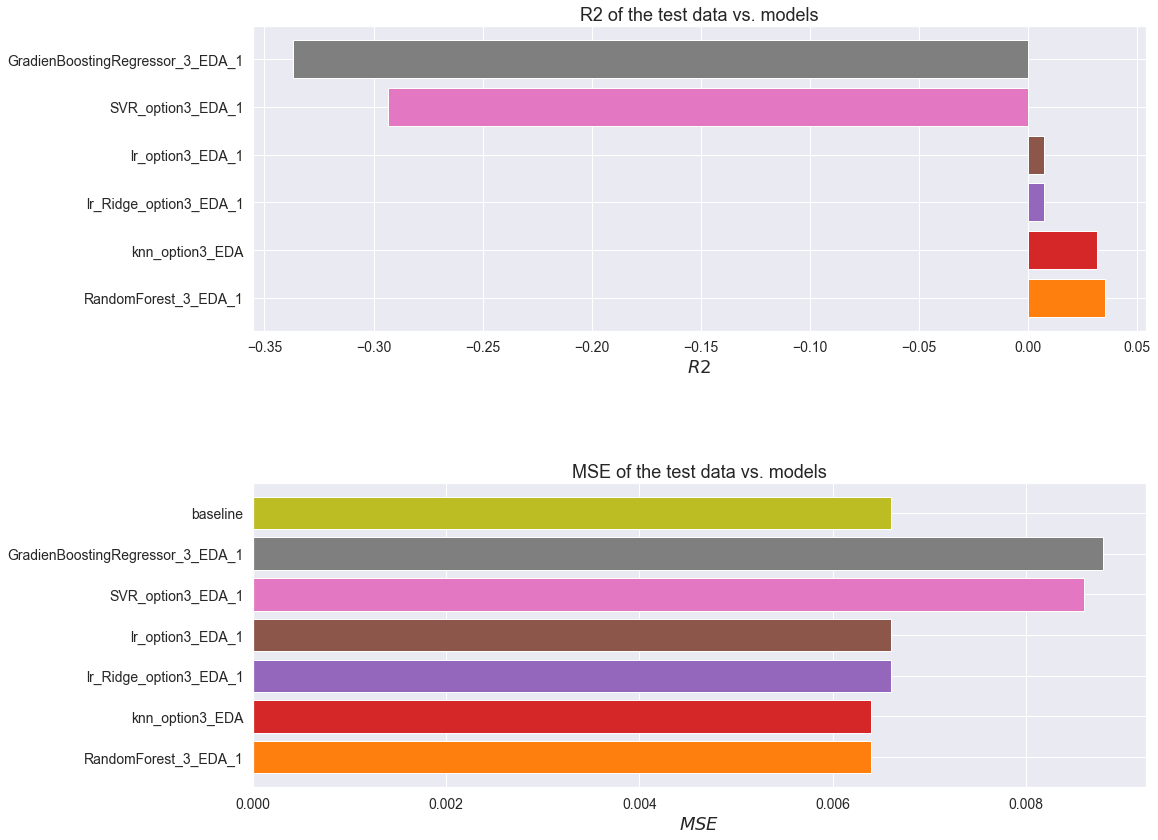

In [27]:
#Plot the results in histogram form based on the dataframe from above

fig, ax = plt.subplots(2,1,figsize=(16,14))

colormap = plt.cm.tab10(range(0, len(total)))

labels = total.Model

#total.plot.barh(x= total['Model'], y= total['mean_test_r2'],color=colormap, alpha=0.5,figsize=(14,6))
ax[0].barh(y= total['file'], width= total['mean_test_r2'],color=colormap)
ax[0].set_title('R2 of the test data vs. models',fontsize=18)
#ax[0].set_xticklabels(labels=labels,rotation=90)
ax[0].set_xlabel('$R2$')


ax[1].barh(y= total['file'], width= total['mean_test_MSE'],color=colormap)
ax[1].set_title('MSE of the test data vs. models', fontsize=18)
#ax[1].set_xticklabels(labels=labels,rotation=90)
ax[1].set_xlabel('$MSE$')

plt.subplots_adjust(hspace=0.5) 
plt.show()

> **Conclusions**:
<br> - All of the analyzed models give very mediocre results. From the bar plot, we can notice that the random forest and the knn perform slightly better, but they seem to suffer from high bias, while the other methods are provided with some overfitting behaviour while being very poor in performance (high bias and high variance?). 
<br> - All the models perform in the same vicinity than the baseline meaning that the simplest approach would have been to perform the mean values for prediction purposes!
<br> - The present analysis means that the data cannot predict linear or non-linear behaviour and that the regression approach is not suitable for approaching a reasonable accuracy with this dataset.
<br> -  Maybe a more reasonable approach instead of focusing on the regression type would have been to consider a classification approach for the concentration, like severe/medium/no risk, for example.
<br> - The data have very few numerical columns, and almost only 0s values and very few non-zeros values may influence the results of the models. The EDA approach was maybe not the best, too many features have been removed, but on the other hand, they had many unknown values or very few and uneven distribution, especially the categorical ones and we keep many outliers in the data analysis which may influence the performance of the models.
<br> - The models have maybe not been fully optimized; I also tried with or without a standard scale, for example, without any significant improvements.